In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import diffimTests as dit

import warnings
warnings.filterwarnings('ignore')

Using flux=620 for SNR=5 (see cell #4 of notebook '30. 4a. other psf models-real PSFs')

In [3]:
n_runs = 100
#psf2 = [2.2, 2.4]
testResults1 = dit.multi.runMultiDiffimTests(varSourceFlux=620., n_runs=n_runs, psf2=psf2)
testResults2 = dit.multi.runMultiDiffimTests(varSourceFlux=620.*np.sqrt(2.), n_runs=n_runs, 
                                             templateNoNoise=False, psf2=psf2)
testResults3 = dit.multi.runMultiDiffimTests(varSourceFlux=620.*np.sqrt(2.), n_runs=n_runs, 
                                             templateNoNoise=False, skyLimited=False, psf2=psf2)

RUNNING: 100
CORES: 3


[Parallel(n_jobs=None)]: Done   1 out of   1 | elapsed:    6.2s remaining:    0.0s
[Parallel(n_jobs=None)]: Done 100 out of 100 | elapsed: 11.0min finished


In [3]:
dit.dumpObjects((testResults1, testResults2, testResults3), 'tmp_pkl')

In [6]:
testResults1, testResults2, testResults3 = dit.loadObjects('tmp_pkl')
#testResults1, testResults2, testResults3 = dit.loadObjects('tmp_pkl_1000runs')

FN: 
ALstack           28.98
ALstack_decorr    29.80
SZOGY             31.57
ZOGY              27.68
dtype: float64
FP: 
ALstack           4.91
ALstack_decorr    4.64
SZOGY             7.11
ZOGY              5.12
dtype: float64
TP: 
ALstack           21.02
ALstack_decorr    20.20
SZOGY             18.43
ZOGY              22.32
dtype: float64


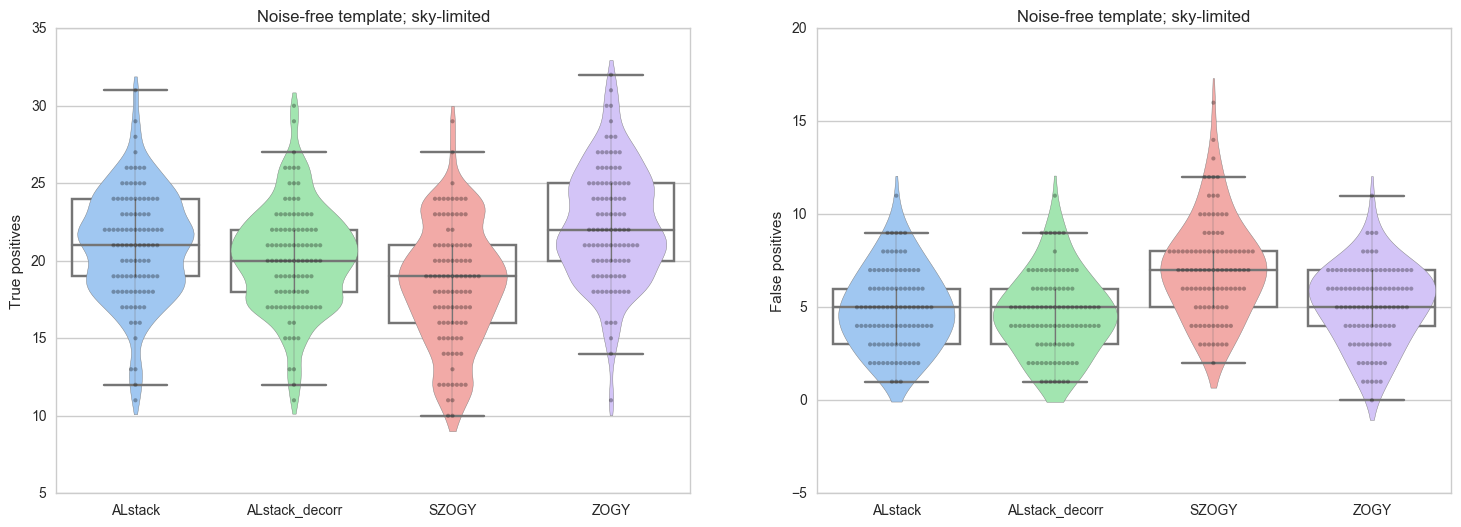

In [7]:
dit.multi.plotResults(testResults1, title='Noise-free template; sky-limited');

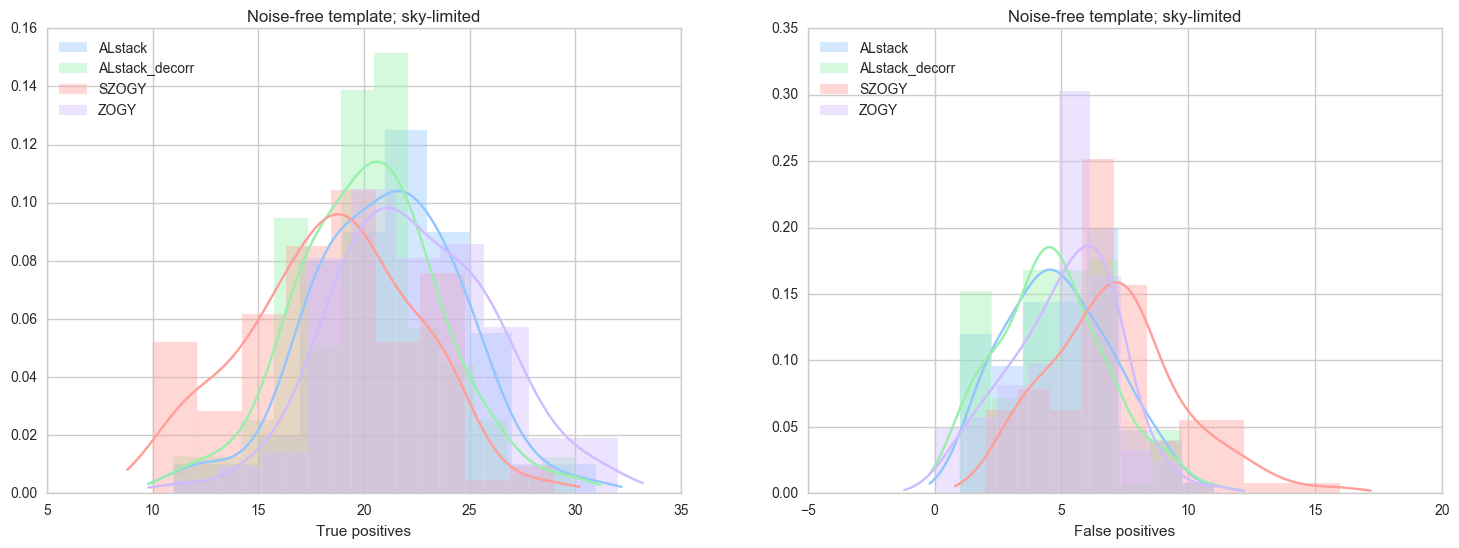

In [8]:
dit.multi.plotResults(testResults1, title='Noise-free template; sky-limited', asHist=True, doPrint=False);

Noise-free template; sky-limited :
AL:		5.09648171076 +/- 0.991147579335
AL(decorr):	5.08483028778 +/- 0.986089891889
ZOGY:		5.05931892796 +/- 0.988336965636


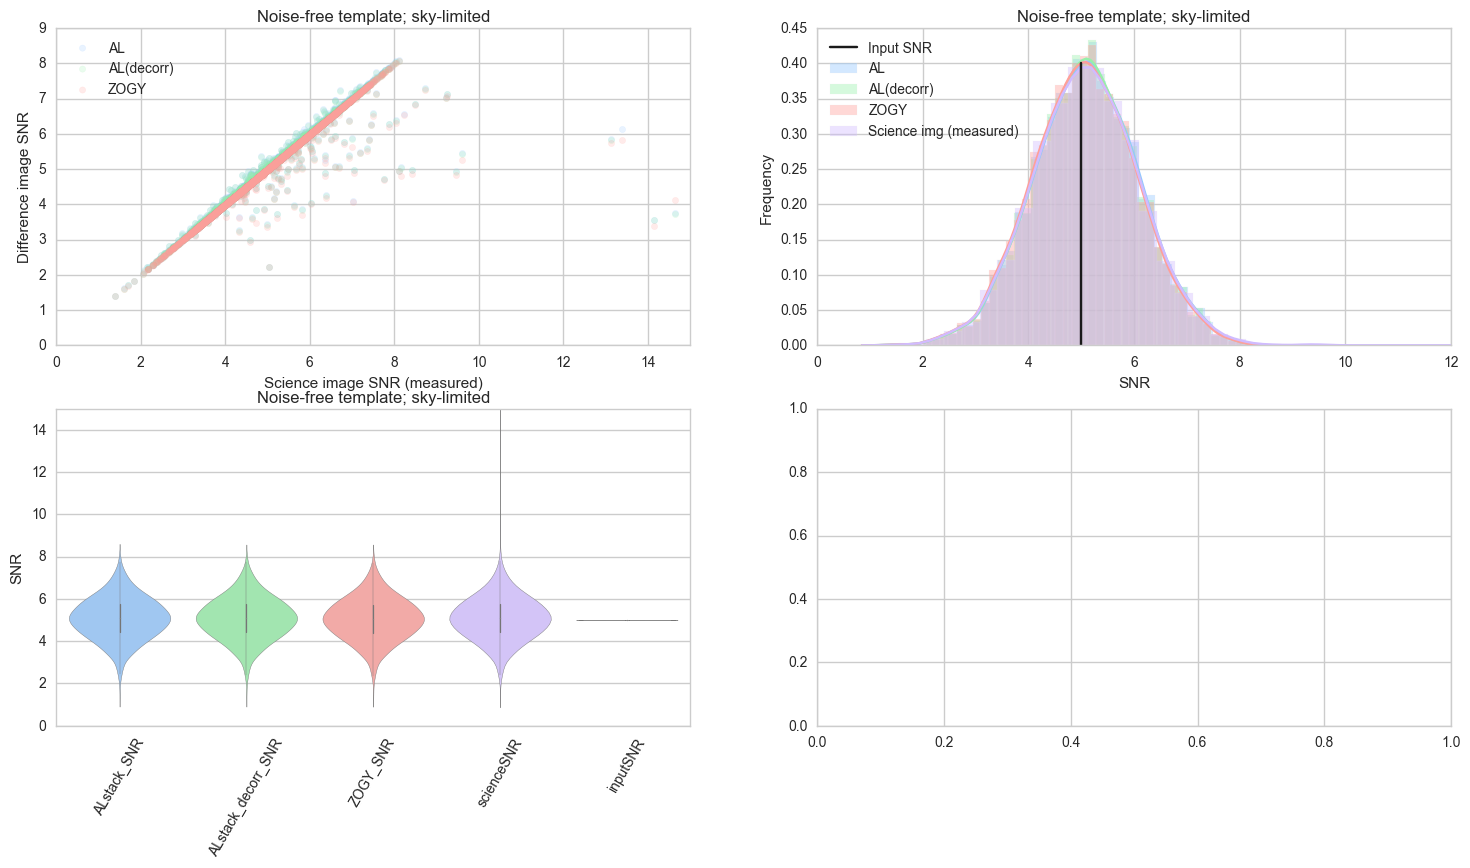

In [9]:
dit.multi.plotSnrResults(testResults1, title='Noise-free template; sky-limited');

FN: 
ALstack           19.79
ALstack_decorr    20.34
SZOGY             23.60
ZOGY              20.04
dtype: float64
FP: 
ALstack           4.57
ALstack_decorr    5.13
SZOGY             6.90
ZOGY              4.85
dtype: float64
TP: 
ALstack           30.21
ALstack_decorr    29.66
SZOGY             26.40
ZOGY              29.96
dtype: float64


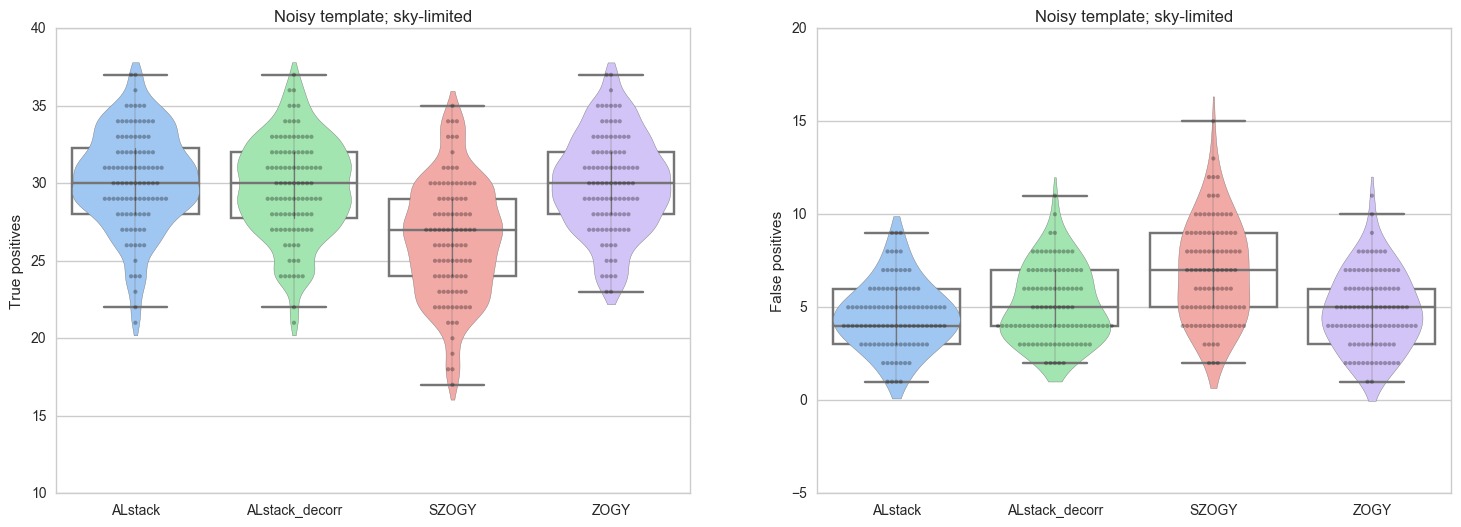

In [10]:
dit.multi.plotResults(testResults2, title='Noisy template; sky-limited');

Noisy template; sky-limited :
AL:		7.04453494926 +/- 1.26285707291
AL(decorr):	5.26444129195 +/- 0.935512868548
ZOGY:		5.4872666654 +/- 1.01171719045


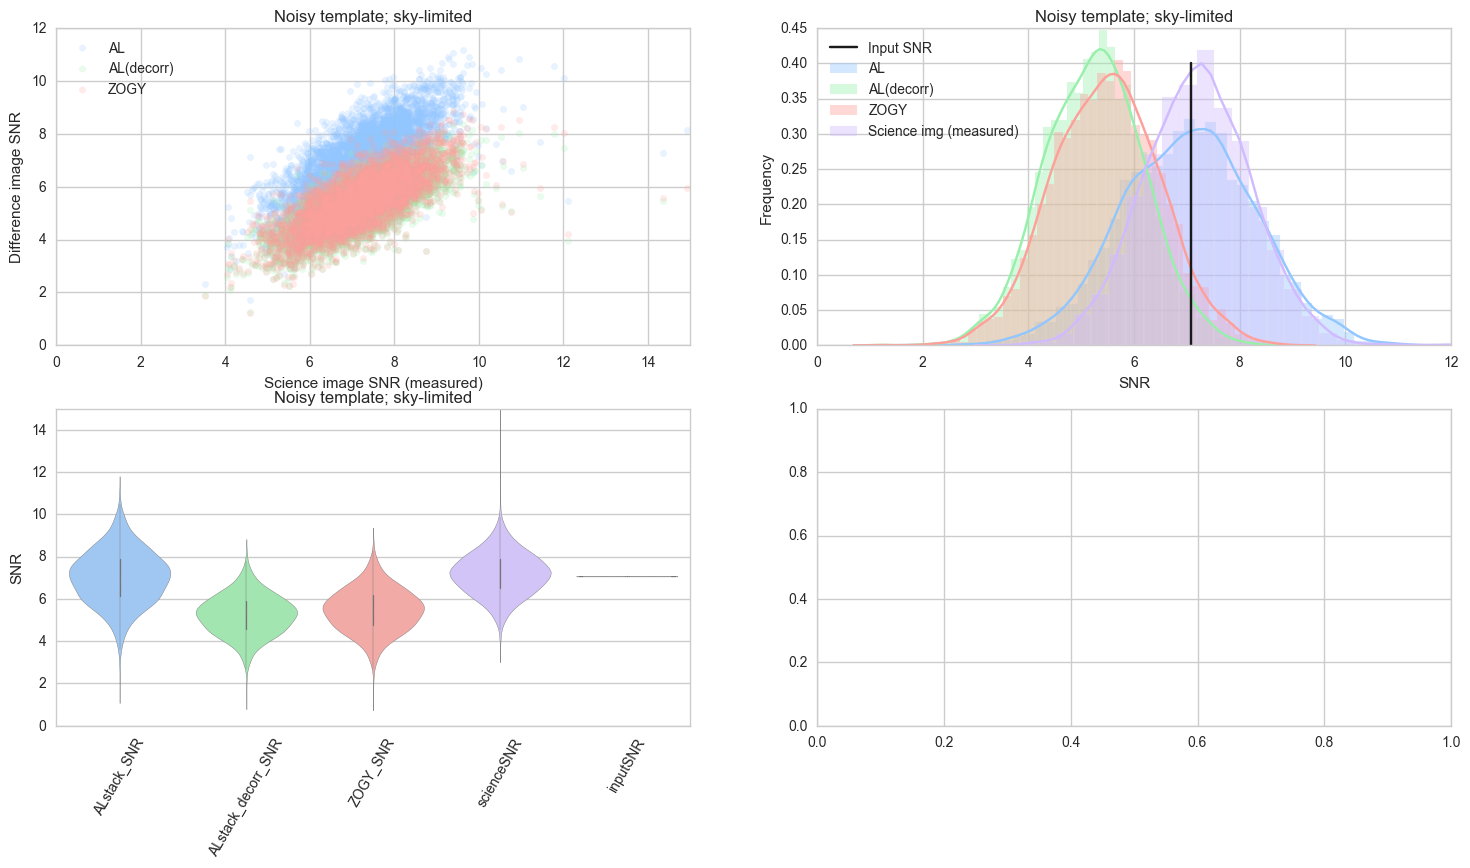

In [11]:
dit.multi.plotSnrResults(testResults2, title='Noisy template; sky-limited');

FN: 
ALstack           19.02
ALstack_decorr    19.58
SZOGY             25.44
ZOGY              20.06
dtype: float64
FP: 
ALstack           6.46
ALstack_decorr    7.42
SZOGY             6.57
ZOGY              4.88
dtype: float64
TP: 
ALstack           30.98
ALstack_decorr    30.42
SZOGY             24.56
ZOGY              29.94
dtype: float64


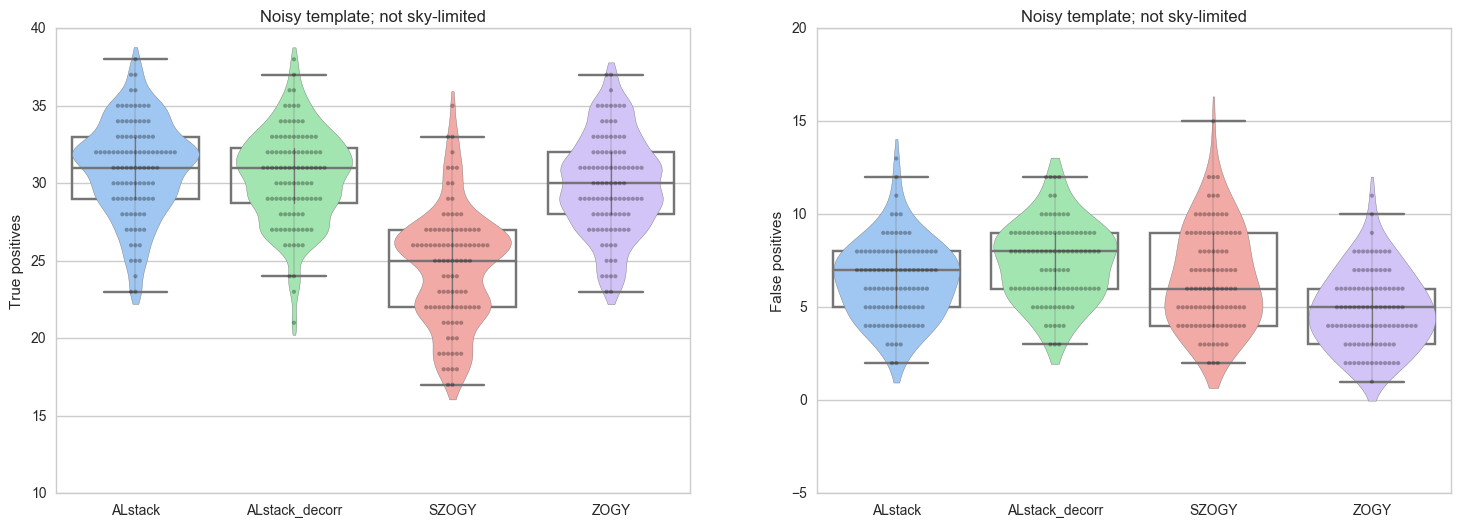

In [12]:
dit.multi.plotResults(testResults3, title='Noisy template; not sky-limited');

Noisy template; not sky-limited :
AL:		6.81114706783 +/- 1.20403373045
AL(decorr):	5.10034911918 +/- 0.893898726564
ZOGY:		5.37858506427 +/- 0.991294007634


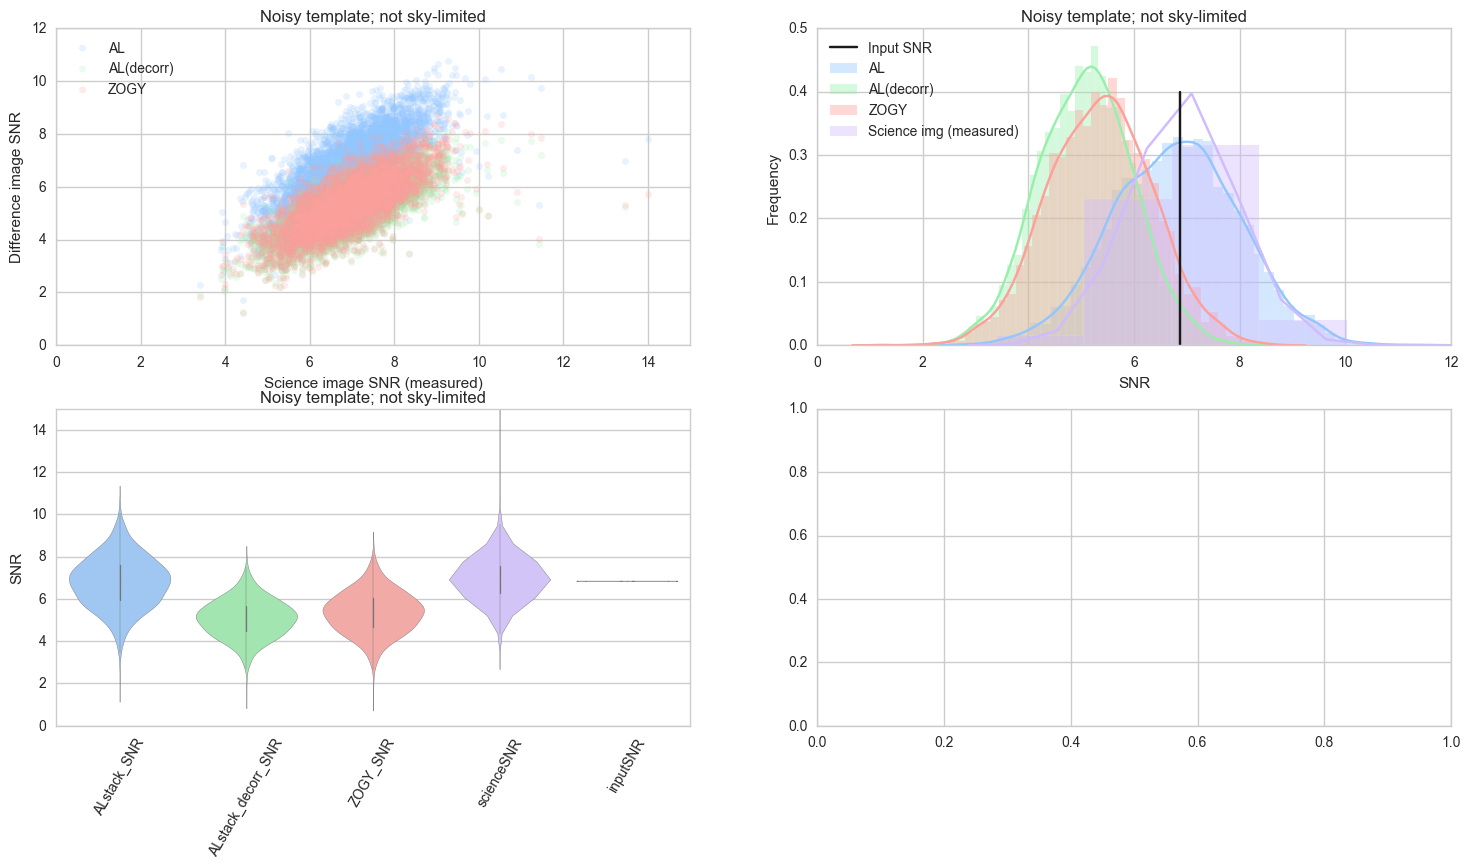

In [13]:
dit.multi.plotSnrResults(testResults3, title='Noisy template; not sky-limited');

#### Figure out what is up with the runs where `ZOGY` is performing poorly.

This goes away when we force it to use `zogyImageSpace=False`.

`ALstack_decorr` seems to be performing poorly (even after fixing the bug that in `ALstack_decorr` PSF calculation, `tvar` and `svar` were mixed up).

This analysis has been moved to notebook `31. new tests-issues with 

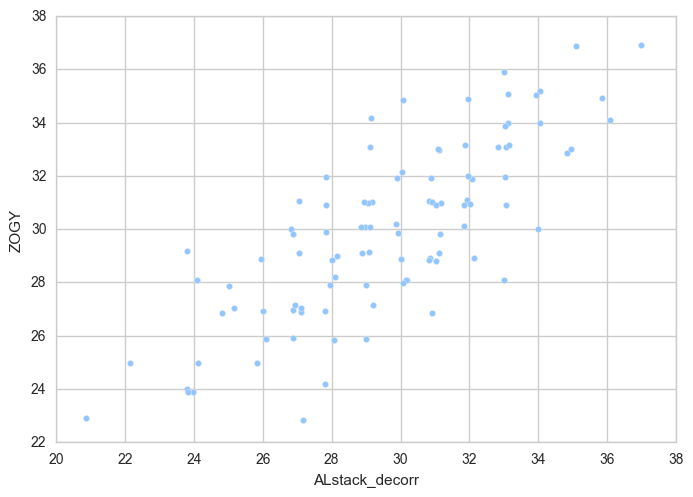

In [14]:
TP, FP, FN = dit.multi.plotResults(testResults2, actuallyPlot=False, doPrint=False)
TP.ALstack_decorr += np.random.uniform(-0.2, 0.2, TP.shape[0])
TP.ZOGY += np.random.uniform(-0.2, 0.2, TP.shape[0])
TP.plot.scatter('ALstack_decorr', 'ZOGY')

In [15]:
TP, FP, FN = dit.multi.plotResults(testResults2, actuallyPlot=False, doPrint=False)
print np.max(TP.ALstack_decorr/TP.ZOGY)
print 1./np.min(TP.ALstack_decorr/TP.ZOGY)
TP[TP.ZOGY/TP.ALstack_decorr > 1.26]

1.17857142857
1.20833333333


,ALstack,ALstack_decorr,SZOGY,ZOGY


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import diffimTests as dit

In [2]:
varSourceFlux = 620. * np.sqrt(2.)
n_runs = 1000
inputs = [(f, seed) for f in [varSourceFlux] for seed in np.arange(66, 66+n_runs, 1)]
i = inputs[896]
res = dit.multi.runTest(flux=i[0], seed=i[1], templateNoNoise=False, skyLimited=False, returnObj=True)
print {key+': '+str(res['result'][key]) for key in ['ALstack', 'ZOGY', 'SZOGY', 'ALstack_decorr']}
testObj = res['obj']

set(["ZOGY: {'FP': 5, 'FN': 17, 'TP': 33}", "SZOGY: {'FP': 6, 'FN': 22, 'TP': 28}", "ALstack_decorr: {'FP': 9, 'FN': 19, 'TP': 31}", "ALstack: {'FP': 2, 'FN': 15, 'TP': 35}"])


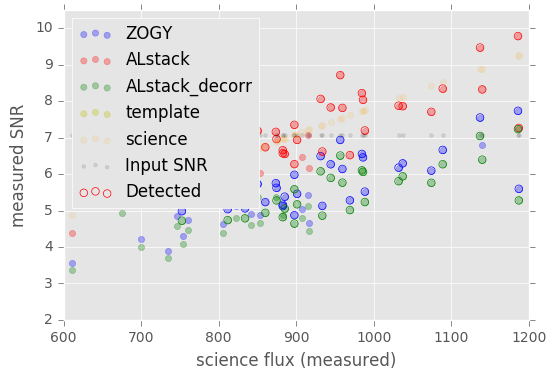

In [4]:
testObj.doPlotWithDetectionsHighlighted(transientsOnly=True, addPresub=True, xaxisIsScienceForcedPhot=True,
                                        skyLimited=True, alpha=0.3);
plt.xlim(600, 1200)
plt.ylim(2, 10.5);
#plt.ylim(5, 10.5);

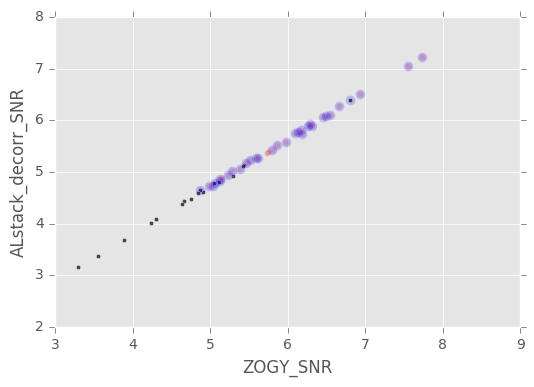

In [5]:
df = res['df']    
ax = df[df.ZOGY_detected == True].plot.scatter('ZOGY_SNR', 'ALstack_decorr_SNR', c='r', alpha=0.2)
df[df.ZOGY_detected == False].plot.scatter('ZOGY_SNR', 'ALstack_decorr_SNR', c='k', s=10, alpha=0.7, ax=ax)
df[df.ALstack_decorr_detected == True].plot.scatter('ZOGY_SNR', 'ALstack_decorr_SNR', c='b', s=50, alpha=0.2, ax=ax)
#plt.xlim(3.5, 7.);
#plt.ylim(3.5, 7.);

In [7]:
tmp = df[(df.ZOGY_detected == True) & (df.ALstack_decorr_detected == False)]
if tmp.shape[0] <= 0:
    tmp = df
dit.sizeme(tmp)

,inputFlux,templateFlux,scienceFlux,inputId,inputCentroid_x,inputCentroid_y,inputSNR,ZOGY_SNR,ZOGY_flux,ZOGY_fluxSigma,...,ALstack_SNR,ALstack_flux,ALstack_fluxSigma,ALstack_detected,ALstack_decorr_SNR,ALstack_decorr_flux,ALstack_decorr_fluxSigma,ALstack_decorr_detected,templateSNR,scienceSNR
8,876.812409,-123.975680,849.984383,9,107.565706,85.672834,6.866453,5.729167,932.136688,162.700212,...,7.191513,930.024702,129.322536,True,5.361517,887.068412,165.451010,False,-1.276206,6.718731
10,876.812409,42.431731,882.559456,11,389.975452,105.169520,6.866453,5.158564,844.844462,163.775116,...,6.568402,852.427627,129.777017,True,4.885071,811.352875,166.088243,False,0.431768,6.953013
35,876.812409,-57.811408,873.626971,36,304.796527,145.132279,6.866453,5.750680,938.008708,163.112656,...,7.156713,927.430389,129.588873,True,5.381059,892.311051,165.824443,False,-0.592292,6.891484


A&L(dec): stats(mean=0.30122051, stdev=24.880106, min=-81.113861, max=97.053085)
ZOGY: stats(mean=0.038653840262990034, stdev=24.208685094474301, min=-104.67345518331459, max=126.97032281979082)
A&L(dec) - ZOGY: stats(mean=-0.0097405372388564889, stdev=2.2354620362198916, min=-7.7229615231590181, max=26.379221861215676)
A&L(dec) - A&L: stats(mean=-0.024847798, stdev=6.7392397, min=-30.601357, max=41.891647)


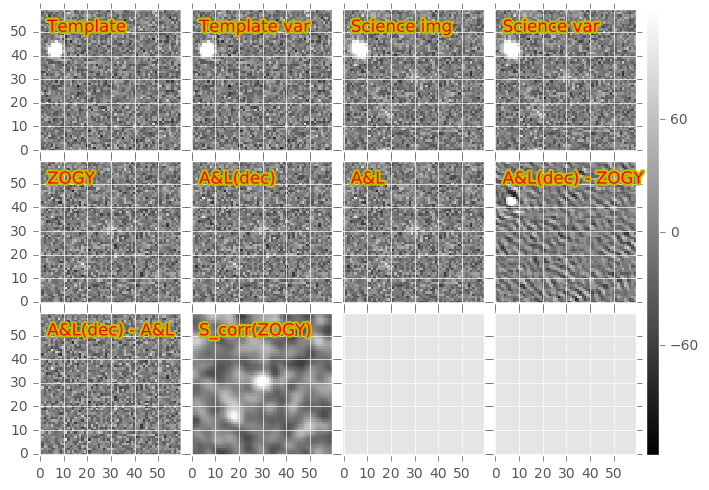

In [9]:
testObj.doPlot([tmp.inputCentroid_y.values[0], tmp.inputCentroid_x.values[0], 30], include_Szogy=True);

This is just to show boundary issues. I have updated the default in `makeFakeImages` to `avoidBorder=2.1` to avoid putting stars within 2.1x the (array) size of the PSF. This should handle all diffim cases for now.

A&L(dec): stats(mean=0.094523899, stdev=24.212894, min=-87.979683, max=105.11473)
ZOGY: stats(mean=0.03863995251558406, stdev=24.213910711623846, min=-104.69914461079632, max=126.99658773734537)
A&L(dec) - ZOGY: stats(mean=0.011213071442163764, stdev=2.0117416206167515, min=-7.3468744128054535, max=13.540806342432738)
A&L(dec) - A&L: stats(mean=-0.023622343, stdev=6.709971, min=-30.542938, max=37.439407)


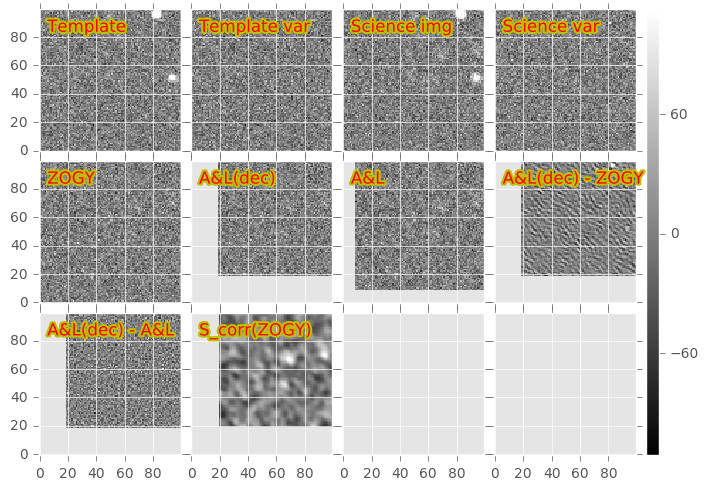

In [8]:
testObj.doPlot([51, 51, 50], include_Szogy=True);

Compare psfs... and also look at the AL(dec) decorrelation kernel

(41, 41) (41, 41) (41, 41)
1.0 1.0 1.0
(-1.6806001035263269e-14, -1.7208456881689889e-14) (5.7176485768195538e-15, 4.3298697960381089e-15) (1.8648277366750692e-17, 1.1102230246251575e-16)
(ixx=3.57189758305, iyy=3.57189758305, ixy=-0.576616992852)
(ixx=3.50838452276, iyy=3.50332230284, ixy=-0.580907860423)
(ixx=4.03994623804, iyy=4.03994623804, ixy=-0.799989278877)
stats(mean=6.6739473690500022e-11, stdev=4.9713781945432736e-10, min=-0.0002262408673881864, max=0.0006988259342616196)
(-0.04039304390829021, 0.035529309612109539)
(-1.0782574560348853e-15, -1.049115362628537e-15)
(10, 10)
(10, 10)


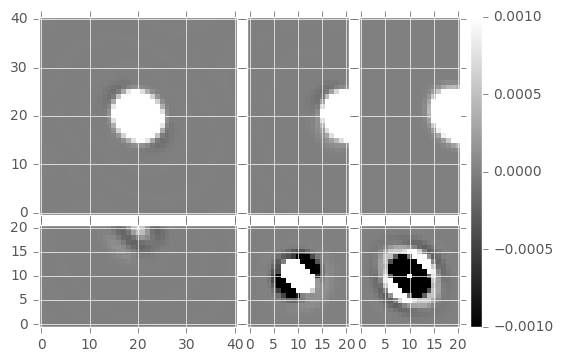

In [10]:
zPSF = testObj.D_ZOGY.psf
adPSF = dit.afw.afwPsfToArray(testObj.ALres.decorrelatedDiffim.getPsf())
aPSF = dit.afw.afwPsfToArray(testObj.ALres.subtractedExposure.getPsf())

print zPSF.shape, adPSF.shape, aPSF.shape
print zPSF.sum(), adPSF.sum(), aPSF.sum()
print dit.psf.computeMoments(zPSF), dit.psf.computeMoments(adPSF), dit.psf.computeMoments(aPSF)
print dit.afw.arrayToAfwPsf(zPSF).computeShape()
print dit.afw.arrayToAfwPsf(adPSF).computeShape()
print dit.afw.arrayToAfwPsf(aPSF).computeShape()

print dit.utils.computeClippedImageStats(adPSF - zPSF)

mk = dit.afw.alPsfMatchingKernelToArray(testObj.ALres.psfMatchingKernel, testObj.ALres.subtractedExposure)
pck = testObj.ALres.decorrelationKernel
print dit.psf.computeMoments(mk)
print dit.psf.computeMoments(pck)
print np.unravel_index(np.argmax(mk), mk.shape)
print np.unravel_index(np.argmax(pck), pck.shape)

dit.plotImageGrid((zPSF, adPSF, aPSF, adPSF-zPSF, mk, pck), clim=(-0.001, 0.001))

Now let's compare the variance planes... Well, let's look at the signal/variance planes.

In [11]:
zvar = testObj.D_ZOGY.var
advar = testObj.ALres.decorrelatedDiffim.getMaskedImage().getVariance().getArray()
avar = testObj.ALres.subtractedExposure.getMaskedImage().getVariance().getArray()

zim = testObj.D_ZOGY.im
adim = testObj.ALres.decorrelatedDiffim.getMaskedImage().getImage().getArray()
aim = testObj.ALres.subtractedExposure.getMaskedImage().getImage().getArray()

#print dit.computeClippedImageStats(testObj.D_ZOGY.var)
#print dit.computeClippedImageStats(testObj.im1.var)
#print dit.computeClippedImageStats(testObj.im2.var)

print dit.computeClippedImageStats(zim)
print dit.computeClippedImageStats(adim)
print dit.computeClippedImageStats(aim)
print
print dit.computeClippedImageStats(zvar)
print dit.computeClippedImageStats(advar)
print dit.computeClippedImageStats(avar)
print
print dit.computeClippedImageStats(zim/zvar)
print dit.computeClippedImageStats(adim/advar)
print dit.computeClippedImageStats(aim/avar)

stats(mean=0.038653840262990034, stdev=24.208685094474301, min=-104.67345518331459, max=126.97032281979082)
stats(mean=0.08758191, stdev=24.11541, min=-104.60962, max=174.90154)
stats(mean=0.084907711, stdev=17.562784, min=-76.408394, max=133.00989)

stats(mean=601.46446895201234, stdev=24.70183521260401, min=493.0, max=2574.0)
stats(mean=606.00946, stdev=33.460293, min=464.2551, max=2209.4258)
stats(mean=315.61722, stdev=17.461391, min=241.58522, max=1152.0302)

stats(mean=-0.00067837915193540014, stdev=0.04021096983673924, min=-0.19100995471407772, max=0.17292461429105965)
stats(mean=-0.0014084362, stdev=0.039736737, min=-0.21067615, max=0.15001403)
stats(mean=-0.0018866109, stdev=0.055543054, min=-0.30838534, max=0.22528192)


Note that sqrt(300 * 2) = 24.49

In [12]:
print testObj.ALres.task.metadata.get("ALBasisSigGauss")
print testObj.ALres.task.metadata.get("ALBasisDegGauss")

print dit.afw.arrayToAfwPsf(testObj.im1.psf).computeShape().getDeterminantRadius()
print dit.afw.arrayToAfwPsf(testObj.im2.psf).computeShape().getDeterminantRadius()
print np.sqrt(1.99**2 - 1.6**2)

(0.5916149628643859, 1.1832299257287717, 2.3664598514575435)
(4, 2, 2)
1.59997320624
1.98996163727
1.18325821358


A&L uses `sqrt(sFWHM**2 - tFWHM**2)` to compute first `basisSigGauss`. If that's smaller than 0.7 (`PsfMatchConfigDF.alardMinSig`), then it uses it as the first one, otherwise it uses it as the middle one. See `makeKernelBasisList.generateAlardLuptonBasisList()`.